# Ejemplo de CNN 2D en la base de datos cifar100

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [3]:
# descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


In [4]:
# Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape)

(50000, 32, 32, 3)


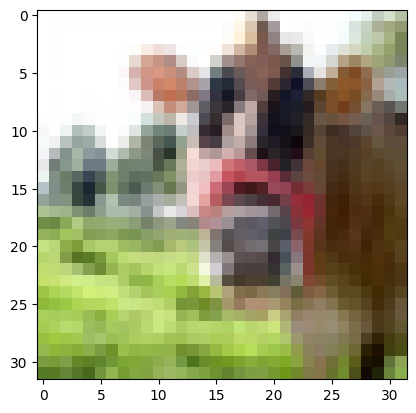

In [5]:
import matplotlib.pyplot as plt

# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")

In [6]:
# one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Modelo

In [7]:
# Hacemos un modelo con varias capas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,GroupNormalization
from tensorflow.keras import regularizers

#crear modelo
model = Sequential()

#Vamos añadiendo capas
model.add(Conv2D(64, kernel_size=7, activation='relu', input_shape=(32,32,3),
                activity_regularizer=regularizers.l1(0.0000000000000001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(32, kernel_size=7, activation='relu',
                activity_regularizer=regularizers.l1(0.0000000000000001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(16, kernel_size=7, activation='relu',
                activity_regularizer=regularizers.l1(0.0000000000000001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(100, activation='softmax'))

In [8]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Este es el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        9472      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        100384    
                                                                 
 batch_normalization_1 (Bat  (None, 20, 20, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 32)        0

In [10]:
# Vamos a usar el callback de earlystopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

In [11]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.01, epochs=20, callbacks=[early_stopping])

Epoch 1/20
1547/1547 [==============================] - 18s 8ms/step - loss: 4.1928 - accuracy: 0.1120 - val_loss: 3.6153 - val_accuracy: 0.1660
Epoch 2/20
1547/1547 [==============================] - 11s 7ms/step - loss: 3.4094 - accuracy: 0.1977 - val_loss: 3.3229 - val_accuracy: 0.2120
Epoch 3/20
1547/1547 [==============================] - 11s 7ms/step - loss: 3.1843 - accuracy: 0.2354 - val_loss: 3.0974 - val_accuracy: 0.2400
Epoch 4/20
1547/1547 [==============================] - 11s 7ms/step - loss: 3.0302 - accuracy: 0.2626 - val_loss: 3.0334 - val_accuracy: 0.2540
Epoch 5/20
1547/1547 [==============================] - 11s 7ms/step - loss: 2.9041 - accuracy: 0.2884 - val_loss: 2.8458 - val_accuracy: 0.2920
Epoch 6/20
1547/1547 [==============================] - 11s 7ms/step - loss: 2.8038 - accuracy: 0.3103 - val_loss: 2.8989 - val_accuracy: 0.3000
Epoch 7/20
1547/1547 [==============================] - 11s 7ms/step - loss: 2.7261 - accuracy: 0.3249 - val_loss: 2.9065 - val_ac

In [12]:
# Evaluamos el modelo
score = model.evaluate(X_test,y_test)
score

313/313 [==============================] - 1s 4ms/step - loss: 2.8158 - accuracy: 0.3231


[2.8158018589019775, 0.3231000006198883]

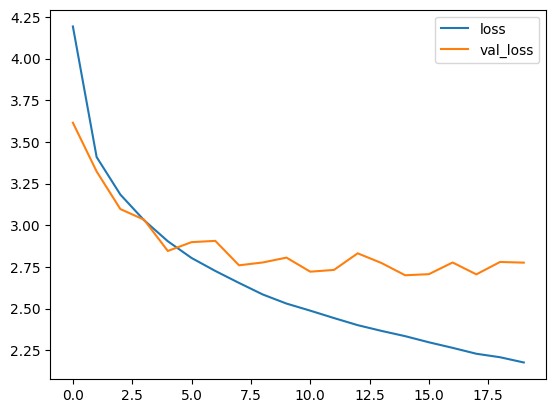

In [13]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()


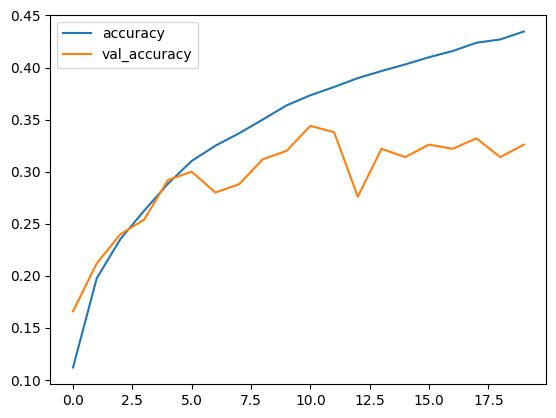

In [14]:
# Ploteamos la evolucion del accuracy durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()


In [15]:
# Predecimos sobre test
preds_test = model.predict(X_test)
preds_test.shape

313/313 [==============================] - 1s 2ms/step


(10000, 100)

57


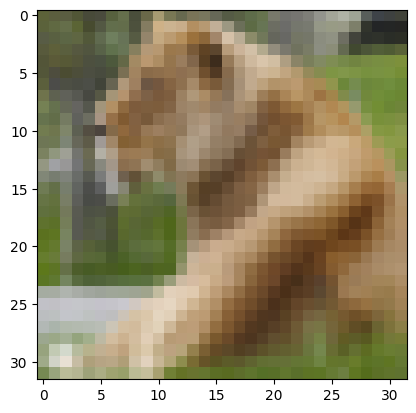

In [16]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 2990
# Mostramos la imagen
plt.imshow(X_test[idx_mostrar,:,:,:])
# Mostramos las probabilidades que da el modelo a cada clase
print(np.argmax(preds_test[idx_mostrar]))